In [1]:
import pandas as pd
import warnings
from scipy.interpolate import lagrange
warnings.filterwarnings("ignore")
inputfile = 'data/catering_sale.xls'
outputfile = 'result/sales.xls'
data = pd.read_excel(inputfile)
data[u'销量'][(data[u'销量']<400)|(data[u'销量']>5000)]=None
def ployinterp_column(s, n, k=5):
    y = s[list(range(n-k, n))+list(range(n+1, n+1+k))]
    y = y[y.notnull()]
    return lagrange(y.index, list(y))(n)
for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:
            data[i][j] = ployinterp_column(data[i], j)
data.to_excel(outputfile)

In [2]:
import numpy as np
datafile = 'data/normalization_data.xls'
data = pd.read_excel(datafile, header=None)
(data-data.min())/(data.max()-data.min())

,0,1,2,3
0,0.074380,0.937291,0.923520,1.000000
1,0.619835,0.000000,0.000000,0.850941
2,0.214876,0.119565,0.813322,0.000000
3,0.000000,1.000000,1.000000,0.563676
4,1.000000,0.942308,0.996711,0.804149
5,0.264463,0.838629,0.814967,0.909310
6,0.636364,0.846990,0.786184,0.929571


In [3]:
(data-data.mean())/data.std()

,0,1,2,3
0,-0.905383,0.635863,0.464531,0.798149
1,0.604678,-1.587675,-2.193167,0.369390
2,-0.516428,-1.304030,0.147406,-2.078279
3,-1.111301,0.784628,0.684625,-0.456906
4,1.657146,0.647765,0.675159,0.234796
5,-0.379150,0.401807,0.152139,0.537286
6,0.650438,0.421642,0.069308,0.595564


In [4]:
data/10**np.ceil(np.log10(data.abs().max()))

,0,1,2,3
0,0.078,0.521,0.602,0.2863
1,0.144,-0.600,-0.521,0.2245
2,0.095,-0.457,0.468,-0.1283
3,0.069,0.596,0.695,0.1054
4,0.190,0.527,0.691,0.2051
5,0.101,0.403,0.470,0.2487
6,0.146,0.413,0.435,0.2571


In [10]:
datafile = 'data/discretization_data.xls'
data = pd.read_excel(datafile)
data = data[u'肝气郁结证型系数'].copy()
k = 4
d1 = pd.cut(data, k, labels=range(k))
w = [1.0*i/k for i in range(k+1)]
w = data.describe(percentiles=w)[4:4+k+1]
w[0] = w[0]*(1-1e-10)
d2 = pd.cut(data, w, labels=range(k))
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters=k, n_jobs=4)
kmodel.fit(data.values.reshape((len(data), 1)))
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)
w = c.rolling(2).mean().iloc[1:]
w = [0] + list(w[0]) + [data.max()]
d3 = pd.cut(data, w, labels=range(k))
def cluster_plot(d, k):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 3))
    for j in range(0, k):
        plt.plot(data[d==j], [j for i in d[d==j]], 'o')
    plt.ylim(-0.5, k-0.5)
    return plt

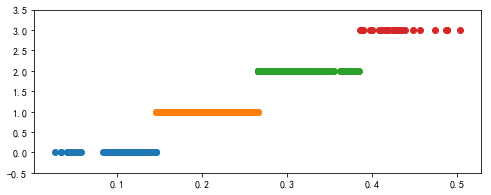

In [14]:
cluster_plot(d1, k).show()

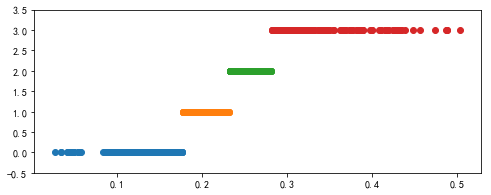

In [12]:
cluster_plot(d2, k).show()

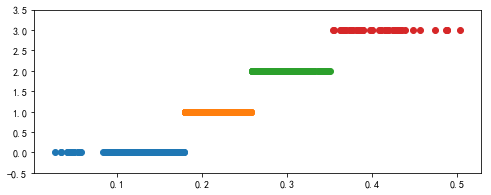

In [13]:
cluster_plot(d3, k).show()

In [15]:
inputfile = 'data/electricity_data.xls'
outputfile = 'result/electricity_data.xls'
data = pd.read_excel(inputfile)
data[u'线损率'] = (data[u'供入电量']-data[u'供出电量'])/data[u'供入电量']
data.to_excel(outputfile, index=False)

In [17]:
inputfile = 'data/leleccum.mat'
from scipy.io import loadmat
mat = loadmat(inputfile)
signal = mat['leleccum'][0]
import pywt
coeffs = pywt.wavedec(signal, 'bior3.7', level=5)

In [18]:
coeffs

[array([2415.1478541 , 2395.74470824, 2402.22022728, 2408.90987352,
        2402.22022728, 2395.74470824, 2415.1478541 , 2369.53622493,
        1958.0913368 , 1983.87619596, 1901.68851538, 1651.86483216,
        1482.45129628, 1356.98779058, 1257.4459793 , 1265.75505172,
        1363.66712581, 1427.53767222, 1568.87951307, 1893.80694993,
        2295.89161125, 2555.9239482 , 2778.31817145, 2871.0940301 ,
        2954.38189098, 2981.0281365 , 2986.06286012, 3091.56214184,
        3085.0678644 , 2840.05639099, 2782.74679521, 2776.99922688,
        2833.0658032 , 2907.76710805, 2496.58749928, 2443.95791914,
        2338.50723857, 2394.15834442, 2186.86013504, 2142.10730351,
        2066.37469747, 2097.47366057, 2190.20987484, 2024.82470966,
        1999.88792082, 1761.22260043, 2012.8983115 , 1733.14320566,
        1955.69105593, 2296.53399998, 2332.11621828, 2436.91433782,
        2248.43497823, 1928.01215666, 1900.73383661, 1804.08152916,
        1596.93576991, 1375.26325034, 1301.52662

In [20]:
inputfile = 'data/principal_component.xls'
outputfile = 'result/dimention_reducted.xls'
data = pd.read_excel(inputfile, header=None)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
pca.components_

array([[ 0.56788461,  0.2280431 ,  0.23281436,  0.22427336,  0.3358618 ,
         0.43679539,  0.03861081,  0.46466998],
       [ 0.64801531,  0.24732373, -0.17085432, -0.2089819 , -0.36050922,
        -0.55908747,  0.00186891,  0.05910423],
       [-0.45139763,  0.23802089, -0.17685792, -0.11843804, -0.05173347,
        -0.20091919, -0.00124421,  0.80699041],
       [-0.19404741,  0.9021939 , -0.00730164, -0.01424541,  0.03106289,
         0.12563004,  0.11152105, -0.3448924 ],
       [-0.06133747, -0.03383817,  0.12652433,  0.64325682, -0.3896425 ,
        -0.10681901,  0.63233277,  0.04720838],
       [ 0.02579655, -0.06678747,  0.12816343, -0.57023937, -0.52642373,
         0.52280144,  0.31167833,  0.0754221 ],
       [-0.03800378,  0.09520111,  0.15593386,  0.34300352, -0.56640021,
         0.18985251, -0.69902952,  0.04505823],
       [-0.10147399,  0.03937889,  0.91023327, -0.18760016,  0.06193777,
        -0.34598258, -0.02090066,  0.02137393]])

In [21]:
pca.explained_variance_ratio_

array([7.74011263e-01, 1.56949443e-01, 4.27594216e-02, 2.40659228e-02,
       1.50278048e-03, 4.10990447e-04, 2.07718405e-04, 9.24594471e-05])

In [22]:
pca = PCA(3)
pca.fit(data)
low_d = pca.transform(data)
pd.DataFrame(low_d).to_excel(outputfile)
pca.inverse_transform(low_d)

array([[41.81945026, 17.92938537,  7.42743613,  6.38423781,  7.51911186,
         7.95581778,  1.89450158, 22.64634237],
       [26.03033486,  8.31048339, 11.0923029 , 10.50941053, 13.73592734,
        19.29219354,  1.55616178, 10.69991334],
       [12.8912027 ,  4.7200299 ,  4.15574756,  3.88084002,  4.15590258,
         5.95354081,  0.63142514,  3.10031979],
       [21.95107023,  7.86983692,  5.61296149,  5.00363184,  5.46598715,
         7.32692984,  1.00043437,  6.90279388],
       [33.2494621 , 16.9295226 ,  6.97070109,  6.54184048,  8.78799069,
         9.47854775,  1.76803069, 25.48379317],
       [35.30223656, 14.31635159, 16.19611986, 15.83211443, 22.51688172,
        30.25654088,  2.46591519, 25.94480913],
       [22.0404299 ,  7.67212745,  9.96458085,  9.59042702, 12.69748404,
        17.7402549 ,  1.39886681, 10.62704002],
       [47.82344306, 16.03581175, 11.11907058,  9.5362307 , 11.08119152,
        14.24461981,  2.12478649, 16.79265084],
       [40.72333307, 17.98533192